##### 사물 이미지 분류 경진대회 EDA
- 10종류의 이미지와 라벨을 이용해 test셋의 이미지들을 적절한 라벨로 분류하는 대회
- label은 0 ~ 9 까지의 정수값

##### 데이터 로드

In [7]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [46]:
# 데이터를 불러올 함수를 정의

def load_CIFAR10(path):
    path = path
    images = []
    labels = []
    for filename in glob(path + '*'):
        for img in glob(filename + '/*.jpg'):
            an_img = PIL.Image.open(img) # read img
            img_array = np.array(an_img) # img to array
            images.append(img_array) # append array to training_images
            label = filename.replace('\\', '/').split('/')[3] # get label
            labels.append(label) # append label
    images = np.array(images) # 빈 리스트에 append 한거라서 np array로 바꿔주는 듯?
    labels = np.array(labels) # 빈 리스트에 append 한거라서 np array로 바꿔주는 듯?

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = labels.reshape(-1, 1)

    return images, labels

##### load_CIFAR10 함수 때문에 애좀 먹었다.
- 인자로 받은 파일 경로에서 glob 라이브러리를 사용해 filename 이라는 문자열을 만든다.

- path + '*' 의 별표는 모든 경로를 뜻한다. 이를 glob의 패턴이라고 한다.

- 8행 반복문에서의 glob의 filename + '/*.jpg'는 filename의 폴더에 모든 .jpg 파일을 img에 문자열로 저장한다.

- 이미지 파일의 경로가 filename/0000.jpg filename/0001.jpg 이런식이라서 0000, 0001 부분이 디렉토리 내의 모든 파일에 접근해야 하므로 *로 한것이다. * 앞의 / 는 filename 이 디렉토리이기 때문에 붙인것이다.

- 이렇게 만든 이미지 파일의 경로를  `an_img` 변수에 `PIL.Image.open` 을 이용해 열어서 넣는다.

- `img_array` 라는 변수에 넘파이 배열을 사용해 `an_img`를 배열로 변경하여 넣는다.

- 이를 빈 리스트 `images`에 append 한다.

- 12행에서 고생좀 했다. 생성된 경로를 `/`를 기준으로 `split` 을 하여 폴더의 디렉터리명을 `label`로 설정하는 코드이다.

- 그런데 데이콘에서 제공되는 코드를 그대로 실행하면 경로에 `\` 역슬래시가 들어가서 `/` 으로 `split` 할 경우 마지막 디렉터리 명을 못가져온다.

- 따라서 `replace` 를 사용해서 `\` 를 `/` 으로 변경한 후에 `/` 를 기준으로 `split` 을 해줬다.

- 그렇게 `[3]` 으로 인덱싱을 해 디렉터리의 폴더 명을 `label` 로 설정한 후에 `labels` 라는 배열에 `append` 한다.

- `images` 와 `labels` 는 리스트이므로 `np.array()` 를 사용해 넘파이 배열로 만들어준다.

- 마지막으로 라벨인코더를 사용해 `labels` 를 인코딩해주고 2차원 배열로 만들어 준 뒤 `images` 와 `labels` 를 리턴한다.

In [47]:
# train 데이터 불러오기

training_images, training_labels = load_CIFAR10(path='./Data/train/') # path를 train 폴더로 설정

위에서 작성한 함수에 path 를 인자로 넘기고 실행하여 각 변수에 학습 데이터를 넣는다.

##### 간단한 EDA
- 이미지 데이터를 전반적으로 살펴봄

- 먼저 이미지 데이터의 크기(shape)를 확인한다.

In [48]:
print('train 이미지 크기: ', training_images.shape)
print('train 라벨 크기: ', training_labels.shape)

train 이미지 크기:  (50000, 32, 32, 3)
train 라벨 크기:  (50000, 1)


- 총 5만개의 이미지가 존재함

- train 이미지에서 마지막 숫자 3은 RGB 값을 타나낸다.

random 함수를 사용해 10개 이미지 출력

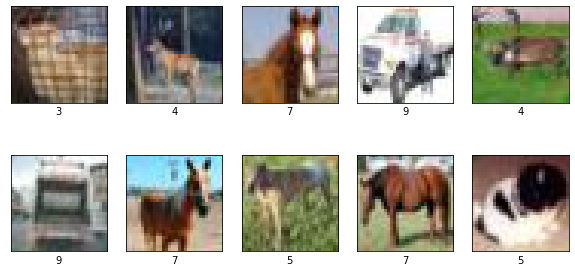

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 5])
for i in range(10):
  import random
  num = random.randint(0, 50000)
  plt.subplot(2, 5, i + 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(training_labels[num][0])
  plt.imshow(training_images[num])

실제 `labels` 의 값이 0 ~ 9 인지 `np.unique()` 사용해서 확인

In [52]:
print(np.unique(training_labels))

[0 1 2 3 4 5 6 7 8 9]


라벨 별 분포를 시각화

Text(0.5, 0, 'Classes')

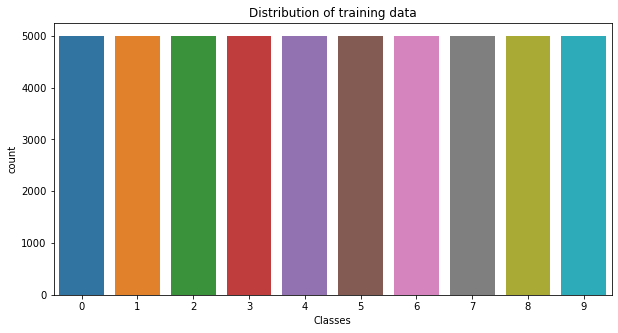

In [55]:
plt.figure(figsize=[10, 5])
sns.countplot(training_labels.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')

- 2행의 코드에서 사용된 `ravel()` 함수는 다차원 배열을 1차원 배열로 바꿔주는 기능을 한다.